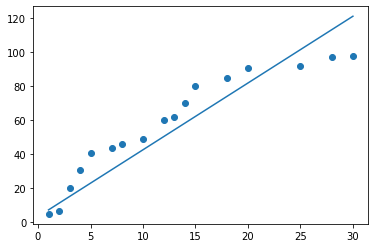

W : [[0.96032469]], b : [[0.47342749]], loss : 2496.150834258855
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.93436152]], b : [[3.30628504]], loss : 150.36283217739876
W : [[3.934

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Training Data Set 만들기
x_data = np.array([1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30]).reshape(-1,1) # 열에 기준을 맞춰서 쉐입을 잡겠다
t_data = np.array([5,7,20,31,41,44,46,49,60,62,70,80,85,91,92,97,98]).reshape(-1,1)


# 데이터 분포 scatter 확인

plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), np.dot(x_data,W) + b)
plt.show()


# Linear Regression Model 정의

W = np.random.rand(1,1) # matrix 
b = np.random.rand(1)   # scalar (절편)


# Hypothesis는 따로 표현하지 않는다

# loss function을 정의

def loss_func(x,t):
    
    y = np.dot(x,W) + b  # Wx + b
    
    return np.mean(np.power((t-y),2))   # 최소제곱법

# 미분

def numerical_derivative(f,x):
    
    # f : 미분하려고 하는 다변수 함수
    # x : 모든 변수를 포함하고 있어야 한다. ndarray(차원 상관없이)
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # 미분한 결과를 저장하는 ndarray
    
    
    # iterator를 이용해서 입력변수 x에 대해서 편미분 수행
    
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        # iterator의 현재 index 추출 (tuple 형태)
        idx = it.multi_index
        
        # 현재 칸의 값을 임시변수에 잠시 저장
        # 입력변수 x마다 편미분을 수행하고 나서 그 값이 변하면 안되기 때문에
        # 값을 저장해두고 계산 마지막에 데이터를 원상복구해둬야 한다
        
        tmp = x[idx]
        
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)  # f(x + delta_x)
        
        
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x) # f(x - delta_x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        # 데이터 원상복구
        x[idx] = tmp 
        
        it.iternext()
        
    return derivative_x


# 학습 종료 후 임의의 데이터에 대한 예측값을 알아오는 함수
# Hypothesis, Linear Regression Model

def predict(x):
    
    return np.dot(x,W) + b  

# learning rate 상수 정의
learning_rate = 0.0001

# 미분을 진행할 loss_func()에 대한 lambda 함수 정의

f = lambda x : loss_func(x_data, t_data)

# 학습을 진행
# 반복해서 학습을 진행 (W와 b를 update를 반복적으로 학습을 진행)

for step in range(100000):
    
    W = W - learning_rate * numerical_derivative(f,W) # W 편미분
    b = b - learning_rate * numerical_derivative(f,W) # b 편미분
    
    if step % 3000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W,b,loss_func(x_data,t_data)))
        
        
# 학습 종료 후 예측

print(predict(23))
        

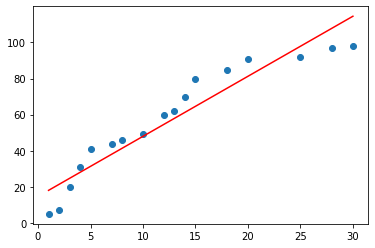

W : [[0.56021222]], b : [0.37964971], loss : 3137.0756073783723
W : [[3.92646255]], b : [3.47308618], loss : 148.88259511848912
W : [[3.79852596]], b : [5.87083878], loss : 129.60624613267015
W : [[3.69327088]], b : [7.8435005], loss : 116.55892732693138
W : [[3.60667618]], b : [9.46643452], loss : 107.72776702039882
W : [[3.53543362]], b : [10.80164309], loss : 101.75034027695331
W : [[3.47682145]], b : [11.90013626], loss : 97.70448115617025
W : [[3.42860047]], b : [12.80388063], loss : 94.96601580514113
W : [[3.38892846]], b : [13.54740268], loss : 93.11246820130937
W : [[3.35628978]], b : [14.15910778], loss : 91.8578827750679
W : [[3.32943752]], b : [14.66236538], loss : 91.00870868939167
W : [[3.30734583]], b : [15.07640185], loss : 90.43393983531304
W : [[3.28917071]], b : [15.41703495], loss : 90.04490389887799
W : [[3.27421781]], b : [15.69727815], loss : 89.78158246320028
W : [[3.26191586]], b : [15.92783781], loss : 89.60335168297313
W : [[3.2517949]], b : [16.1175222], loss

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Training Data Set 

x_data = np.array([1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30]).reshape(-1,1)
t_data = np.array([5,7,20,31,41,44,46,49,60,62,70,80,85,91,92,97,98]).reshape(-1,1)


# 데이터 분포 확인
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), np.dot(x_data,W) + b, color = 'r')
plt.show()

# Linear Regression Model 정의

W = np.random.rand(1,1) # matrix

b = np.random.rand(1)   # scalar


# loss function을 정의

def loss_func(x,t):
    
    y = np.dot(x,W) + b  # Wb + b
    
    return np.mean(np.power((t-y),2))  # 최소제곱법


# 미분함수

def numerical_derivative(f,x):
    
    # f : 미분하고자 하는 다변수 함수
    # x : ndarray. 모든 변수를 포함하고 있어야 한다
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # 미분한 결과를 저장하는 ndarray
    
    # iterator를 이용해서 입력변수 x에 대해 편미분 수행
    
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        # iterator의 현재 index 추출(tuple로 추출)
        idx = it.multi_index
        
        # idx의 값을 임시변수에 저장
        # x마다 편미분을 수행할 때 해당 값이 바뀌지 않게끔 저장
        tmp = x[idx]
        
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)  # f(x + delta_x)
        
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x) # f(x - delta_x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp
        
        it.iternext()
        
    return derivative_x

# 학습 종료 후 임의의 데이터에 대한 예측값을 알아온다
# prediction

def predict(x):
    
    return np.dot(x,W) + b


# learning rate 상수 정의

learning_rate = 0.0001

# loss_function에 대한 f 함수 정의 (lambda로 정의)

f = lambda x : loss_func(x_data, t_data)

# 반복해서 학습을 진행(W,b를 update를 반복적으로 학습을 진행)

for step in range(90000):
    
    W = W - learning_rate * numerical_derivative(f,W)
    b = b - learning_rate * numerical_derivative(f,b)
    
    if step % 3000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W,b,loss_func(x_data, t_data)))
        

# 학습종료 후 예측

print(predict(19))
    
 


In [ ]:
# AI - 인공지능 Artificial Intelligence
# 사람이 가지는 가장 큰 특성이라고 할 수 있는 학습능력 , 추론능력을 컴퓨터를 통해서 구현하는 가장 큰 포괄적인 개념

# Machine Learning
# AI를 구현하기 위한 하나의 방법
# 데이터를 이용해서 데이터의 특성과 패턴을 파악한 후 해당 내용을 학습해서 
# 그 결과를 바탕으로 미지의 데이터에 대해 미래 결과를 예측

# Linear Regression, Logistic Regression
# SVM(Support Veoctor Machine)
# Decision tree
# Random Forest
# Naive Bayes
# KNN
# Neural Network
# Clustering

# Deep Learning 
# 머신러닝을 구현하기 위한 하나의 방법인 신경망을 이용하는 구조 알고리즘의 집합
# CNN, RNN, LSTM, GAN


# 지도학습(Supervised Learning)
# 비지도학습(Unsupervised Learning)
# 준지도학습(Semisupervised Learning)
# 강화학습(Reinforcement Learning)

# 지도학습
# 입력값과 Label을 포함하는 Training Data Set을 이용하여 학습을 진행
# 그 학습된 결과를 바탕으로 미지의 데이터에 대한 미래 예측값을 알아내는 방법

# 어떤 종류의 미래값을 예측하느냐에 따라
# Regression(회귀) : 학습된 결과를 바탕으로 연속적인 숫자값을 예측
# Linear Regression -  '얼마나' 를 예측하는 방법

# Logistic Regression은 분류기법 

# Classification(분류) : 학습된 결과를 바탕으로 주어진 입력값이 
#                       어떤 종류의 값인지를 구별하는 방법
#                       '어떤 것'인가를 예측
# binary classification - 둘 중 하나를 예측
# mutinomial classification - 여러 개 중 하나를 예측



In [ ]:
# 머신러닝을 구현하기 위해 Regression(회귀)를 이용

# 보편적 선형 회귀 모형을 사용 예정 -> Classical Linear Regression Model

